# Part I: Data Preparation

## Read data from csv

In [1]:
import pandas as pd
import numpy as np
import os 
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder


class DataUtil(object):

    DATA_PATH = "data/"
    PROCESSED_DATA_PATH = "processed_data/"
    
    def load_data(self, data_path = DATA_PATH):
        csv_path = os.path.join(data_path, "KaggleV2-May-2016.csv")
        na_values = ['N/A']
        return pd.read_csv(csv_path, na_values=na_values, dtype={'Age': int, 'PatientId': str, 'AppointmentID': str})
    
    def clean_data(self, data):
        scheduled_month_list = []
        scheduled_hour_list = []
        appointment_month_list = []
        appointment_hour_list = []
        
        
        for index, row in data.iterrows():
            gender = row['Gender']
            if gender != 'F' and gender != 'M':
                print('error')
            
            scheduled_day = row['ScheduledDay'] 
            scheduled_day_obj = time.strptime(scheduled_day, "%Y-%m-%dT%H:%M:%SZ")
            scheduled_month = time.strftime("%m", scheduled_day_obj)
            scheduled_month_list.append(scheduled_month)
            scheduled_hour = time.strftime("%H", scheduled_day_obj)
            scheduled_hour_list.append(scheduled_hour)
            data.set_value(index, 'ScheduledDay', time.strftime("%Y-%m-%d %H:%M:%S", scheduled_day_obj))
            
            appointment_day = row['AppointmentDay'] 
            appointment_day_obj = time.strptime(scheduled_day, "%Y-%m-%dT%H:%M:%SZ")
            appointment_month = time.strftime("%m", appointment_day_obj)
            appointment_month_list.append(appointment_month)
            appointment_hour = time.strftime("%H", appointment_day_obj)
            appointment_hour_list.append(appointment_hour)
            data.set_value(index, 'AppointmentDay', time.strftime("%Y-%m-%d %H:%M:%S", appointment_day_obj))
            
            
                            
            age = row['Age']
            if age < 0 or age > 200:
                data.set_value(index, 'Age', -1)
                

        data.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',  
                        'appointment_day', 'age', 'neighbourhood', 'scholarship', 
                        'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']  
        
        data['scheduled_month'] = scheduled_month_list
        data['scheduled_hour'] = scheduled_hour_list
        data['appointment_month'] = appointment_month_list
        data['appointment_hour'] = appointment_hour_list
        '''
        data.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
                        'appointment_day', 'appointment_month', 'appointment_hour', 'age', 'neighbourhood', 'scholarship', 
                        'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']        
        '''
        print(data)
        
        return data        
     
    def create_test_data(self, data):
        print(data['no_show'].value_counts() / len(data))   
        
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.9047, random_state=0)
        
        for train_index, test_index in sss.split(data, data["no_show"]):
            train_set = data.loc[train_index]
            test_set = data.loc[test_index]
        
        print(train_set)
        train_set.to_csv(self.PROCESSED_DATA_PATH + 'train.csv')
        test_set.to_csv(self.PROCESSED_DATA_PATH + 'test.csv')
        
        print(train_set["no_show"].value_counts() / len(train_set))      
        print(test_set["no_show"].value_counts() / len(test_set)) 

    
    
# ============== Main =========================

pd.set_option('display.expand_frame_repr', False)
            
data_util = DataUtil()

data = data_util.load_data()






## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [2]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df
clean_data = data_util.clean_data(data)

             patient_id appointment_id gender        scheduled_day      appointment_day  age      neighbourhood  scholarship  hipertension  diabetes  alcoholism  handicap  sms_received no_show scheduled_month scheduled_hour appointment_month appointment_hour
0        29872499824296        5642903      F  2016-04-29 18:38:08  2016-04-29 18:38:08   62    JARDIM DA PENHA            0             1         0           0         0             0      No              04             18                04               18
1       558997776694438        5642503      M  2016-04-29 16:08:27  2016-04-29 16:08:27   56    JARDIM DA PENHA            0             0         0           0         0             0      No              04             16                04               16
2         4262962299951        5642549      F  2016-04-29 16:19:04  2016-04-29 16:19:04   62      MATA DA PRAIA            0             0         0           0         0             0      No              04             16

## Test set creation

- Create a test set of 100k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [3]:
PROCESSED_DATA_DIR = 'processed_data'

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example


data_util.create_test_data(clean_data)

No     0.798067
Yes    0.201933
Name: no_show, dtype: float64
             patient_id appointment_id gender        scheduled_day      appointment_day  age     neighbourhood  scholarship  hipertension  diabetes  alcoholism  handicap  sms_received no_show scheduled_month scheduled_hour appointment_month appointment_hour
88354    17346672733819        5710487      F  2016-05-17 16:17:18  2016-05-17 16:17:18   72           ITARARÉ            0             1         0           0         0             1     Yes              05             16                05               16
71100    33894892821699        5658822      F  2016-05-04 12:02:55  2016-05-04 12:02:55   40            CENTRO            0             0         0           0         0             0      No              05             12                05               12
66260   198323769778213        5494905      M  2016-03-21 10:59:07  2016-03-21 10:59:07   52    JARDIM CAMBURI            0             0         0           0     

[10533 rows x 18 columns]
No     0.798063
Yes    0.201937
Name: no_show, dtype: float64
No     0.798068
Yes    0.201932
Name: no_show, dtype: float64


## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

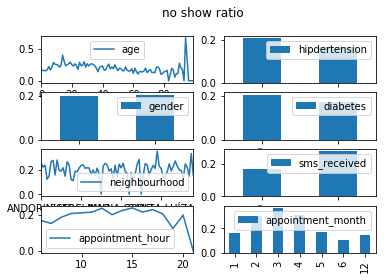

In [10]:
# Make plots here!

import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer



class Part_I_Exploere(object):
    
    DATA_PATH = "data/"
    PROCESSED_DATA_PATH = "processed_data/"

    def load_train_data(self, data_path = PROCESSED_DATA_PATH):
        csv_path = os.path.join(data_path, "train.csv")
        na_values = ['N/A']
        return pd.read_csv(csv_path, na_values=na_values, dtype={'Age': int, 'PatientId': str, 'AppointmentID': str})
    

    def plot_no_show_against_others(self, train_data):
        total_count_by_age = [0] * 100 
        no_show_count_by_age = [0] * 100 
        no_show_ratio_by_age = [0] * 100    
        total_count_by_gender = {'M': 0, 'F': 0}
        no_show_count_by_gender = {'M': 0, 'F': 0}
        no_show_ratio_by_gender = {'M': 0, 'F': 0}
        total_count_by_neighbourhood = {}
        no_show_count_by_neighbourhood = {} 
        no_show_ratio_by_neighbourhood = {}
        total_count_by_hipdertension = [0] * 2 
        no_show_count_by_hipdertension = [0] * 2 
        no_show_ratio_by_hipdertension = [0] * 2 
        total_count_by_diabetes = [0] * 2 
        no_show_count_by_diabetes = [0] * 2 
        no_show_ratio_by_diabetes = [0] * 2 
        total_count_by_sms_received = [0] * 2 
        no_show_count_by_sms_received = [0] * 2 
        no_show_ratio_by_sms_received = [0] * 2
        total_count_by_appointment_hour = {}
        no_show_count_by_appointment_hour = {} 
        no_show_ratio_by_appointment_hour = {}
        total_count_by_appointment_month = {}
        no_show_count_by_appointment_month = {} 
        no_show_ratio_by_appointment_month = {}
        
        for index, row in train_data.iterrows():
            age = row['age']
            gender = row['gender']
            no_show = row['no_show']
            neighbourhood = row['neighbourhood']
            hipertension = row['hipertension']
            diabetes = row['diabetes']
            sms_received = row['sms_received']
            appointment_hour = row['appointment_hour']
            appointment_month = row['appointment_month']
            
            total_count_by_age[age] += 1
            total_count_by_gender[gender] += 1
            
            if neighbourhood in total_count_by_neighbourhood:
                total_count_by_neighbourhood[neighbourhood] += 1
            else:
                total_count_by_neighbourhood[neighbourhood] = 0
                no_show_count_by_neighbourhood[neighbourhood] = 0
                no_show_ratio_by_neighbourhood[neighbourhood] = 0
                
            if appointment_hour in total_count_by_appointment_hour:
                total_count_by_appointment_hour[appointment_hour] += 1
            else:
                total_count_by_appointment_hour[appointment_hour] = 1
                no_show_count_by_appointment_hour[appointment_hour] = 0 
                no_show_ratio_by_appointment_hour[appointment_hour] = 0
            
            if appointment_month in total_count_by_appointment_month:
                total_count_by_appointment_month[appointment_month] += 1
            else:
                total_count_by_appointment_month[appointment_month] = 1
                no_show_count_by_appointment_month[appointment_month] = 0 
                no_show_ratio_by_appointment_month[appointment_month] = 0            
            
            
                
            total_count_by_hipdertension[hipertension] += 1
            total_count_by_diabetes[diabetes] += 1
            total_count_by_sms_received[sms_received] += 1     
              
                
            if no_show == 'Yes':
                no_show_count_by_age[age] += 1
                no_show_count_by_gender[gender] += 1
                no_show_count_by_neighbourhood[neighbourhood] += 1
                no_show_count_by_hipdertension[hipertension] += 1
                no_show_count_by_diabetes[diabetes] += 1
                no_show_count_by_sms_received[sms_received] += 1
                no_show_count_by_appointment_hour[appointment_hour] += 1
                no_show_count_by_appointment_month[appointment_month] += 1
                
        for i in range(0, 100):
            if total_count_by_age[i] != 0:
                no_show_ratio_by_age[i] = float(no_show_count_by_age[i]) / total_count_by_age[i]
                #print("age: {}, total: {}, no_show: {}, ratio: {}".format(i, total_count_by_age[i], no_show_count_by_age[i], ratio))
        
        
        for i in range(0, 2):
            no_show_ratio_by_hipdertension[i] = float(no_show_count_by_hipdertension[i]) / total_count_by_hipdertension[i]
            no_show_ratio_by_diabetes[i] = float(no_show_count_by_diabetes[i]) / total_count_by_diabetes[i]
            no_show_ratio_by_sms_received[i] = float(no_show_count_by_sms_received[i]) / total_count_by_sms_received[i]
            #print('hipertension: {}, total: {}, no show: {}'.format(i, total_count_by_hipdertension[i], no_show_count_by_hipdertension[i]))
        
        
        no_show_ratio_by_male = float(no_show_count_by_gender['M']) / total_count_by_gender['M']
        no_show_ratio_by_female = float(no_show_count_by_gender['F']) / total_count_by_gender['F']
        no_show_ratio_by_gender['M'] = no_show_ratio_by_male
        no_show_ratio_by_gender['F'] = no_show_ratio_by_female
        #print(total_count_by_gender['F'])
        
        for key in total_count_by_neighbourhood:
            no_show_ratio_by_neighbourhood[key] = float(no_show_count_by_neighbourhood[key])/total_count_by_neighbourhood[key]
            #print("neighbourhood:{}, total: {}, now show: {}".format(key, total_count_by_neighbourhood[key], no_show_count_by_neighbourhood[key]))
        
        for key in total_count_by_appointment_hour:
            no_show_ratio_by_appointment_hour[key] = float(no_show_count_by_appointment_hour[key])/total_count_by_appointment_hour[key]
            #print("hour:{}, total: {}, now show: {}".format(key, total_count_by_appointment_hour[key], no_show_count_by_appointment_hour[key]))

        for key in total_count_by_appointment_month:
            no_show_ratio_by_appointment_month[key] = float(no_show_count_by_appointment_month[key])/total_count_by_appointment_month[key]
        
        fig, axes = plt.subplots(nrows=4, ncols=2)

        
        age_list = pd.DataFrame({
            'age': no_show_ratio_by_age
        })
        age_list.plot(ax=axes[0,0])
        
        gender_list = pd.DataFrame({
            'gender': no_show_ratio_by_gender
        })
        gender_list.plot(ax=axes[1,0], kind='bar')
        
        neighbourhood_list = pd.DataFrame({
            'neighbourhood': no_show_ratio_by_neighbourhood
        })
        neighbourhood_list.plot(ax=axes[2,0])
        
        hipdertension_list = pd.DataFrame({
            'hipdertension': no_show_ratio_by_hipdertension
        })
        hipdertension_list.plot(ax=axes[0,1], kind='bar')
        
        diabetes_list = pd.DataFrame({
            'diabetes': no_show_ratio_by_diabetes
        })
        diabetes_list.plot(ax=axes[1,1], kind='bar')
        
        diabetes_list = pd.DataFrame({
            'sms_received': no_show_ratio_by_sms_received
        })
        diabetes_list.plot(ax=axes[2,1], kind='bar')
        
        appointment_hour_list = pd.DataFrame({
            'appointment_hour': no_show_ratio_by_appointment_hour
        })
        appointment_hour_list.plot(ax=axes[3,0])
        
        appointment_month_list = pd.DataFrame({
            'appointment_month': no_show_ratio_by_appointment_month
        })
        appointment_month_list.plot(ax=axes[3,1], kind='bar')        
        
        plt.suptitle('no show ratio')
        plt.show()
                
                
                
                
                
    def preprocess(self, df):
        le_neib = LabelEncoder()
        df["neighbourhood_code"] = le_neib.fit_transform(df["neighbourhood"])
       
        lb_gender = LabelBinarizer()
        lb_results = lb_gender.fit_transform(df["gender"])
        
        df['is_male'] = lb_results        
        print(df.head())
                
                
# ============== Main =========================
                
pd.set_option('display.expand_frame_repr', False)
        
exploerer = Part_I_Exploere()
train_data = exploerer.load_train_data()
train_data.drop(train_data.columns[[0]], axis=1, inplace=True)

exploerer.plot_no_show_against_others(train_data)


## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# create pipeline here!

# show the first 5 rows of the transformed training set
exploerer.preprocess(train_data)

     patient_id  appointment_id gender        scheduled_day      appointment_day  age   neighbourhood  scholarship  hipertension  diabetes  alcoholism  handicap  sms_received no_show  scheduled_month  scheduled_hour  appointment_month  appointment_hour  neighbourhood_code  is_male
0  1.734667e+13         5710487      F  2016-05-17 16:17:18  2016-05-17 16:17:18   72         ITARARÉ            0             1         0           0         0             1     Yes                5              16                  5                16                  33        0
1  3.389489e+13         5658822      F  2016-05-04 12:02:55  2016-05-04 12:02:55   40          CENTRO            0             0         0           0         0             0      No                5              12                  5                12                   9        0
2  1.983238e+14         5494905      M  2016-03-21 10:59:07  2016-03-21 10:59:07   52  JARDIM CAMBURI            0             0         0           0    